In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

### Load data: model predictions and true values

In [2]:
metrics = []

subsets = [580, 900, 4500, 9000, 45000, 90000, 450000]
amounts = [f"subset_{subset}" for subset in subsets] + ["full_848597"]

for amt in amounts:
    df = pd.read_csv(f"model_predictions/Graphinity_predictions_test-varying_dataset_size-{amt}.csv")
    
    # pearson's correlation
    pc = round(pearsonr(df["true_label"],df["pred_score"])[0], 3)
    
    # standard deviation ratio
    sdr = df["pred_score"].std()/df["true_label"].std()
    if sdr > 1:
        sdr = df["true_label"].std()/df["pred_score"].std()
    
    metrics.append([int(amt.split("_")[1]), pc, sdr])

In [3]:
metrics_df = pd.DataFrame(metrics, columns=["Dataset Size","Test Pearson's Correlation","Standard Deviation Ratio"])

### Plot

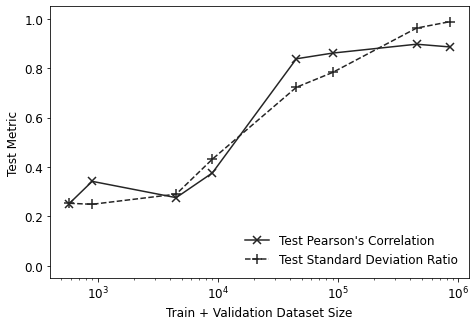

In [4]:
fig,ax = plt.subplots(figsize=(7.5,5))

ax.plot(metrics_df["Dataset Size"],metrics_df["Test Pearson's Correlation"],
        marker="x", color="#252525", linestyle="-", markersize=8, markeredgewidth=1.5,
        label="Test Pearson's Correlation")
ax.plot(metrics_df["Dataset Size"],metrics_df["Standard Deviation Ratio"],
         marker="+", color="#252525", linestyle="--", markersize=10, markeredgewidth=1.5,
         label="Test Standard Deviation Ratio")

ax.set_ylabel("Test Metric", fontsize=12)
ax.set_xlabel("Train + Validation Dataset Size", fontsize=12)
ax.set_ylim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)

plt.xscale("log")

ax.tick_params(axis="both", which="major", labelsize=12)
ax.legend(frameon=False, bbox_to_anchor=(1,0.2), fontsize=12)

plt.savefig("Figure-3a.png", dpi=300)